In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

C:\Users\user\AppData\Local\Temp\ipykernel_4684\2207088679.py:9: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


Total records: 9609797
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object

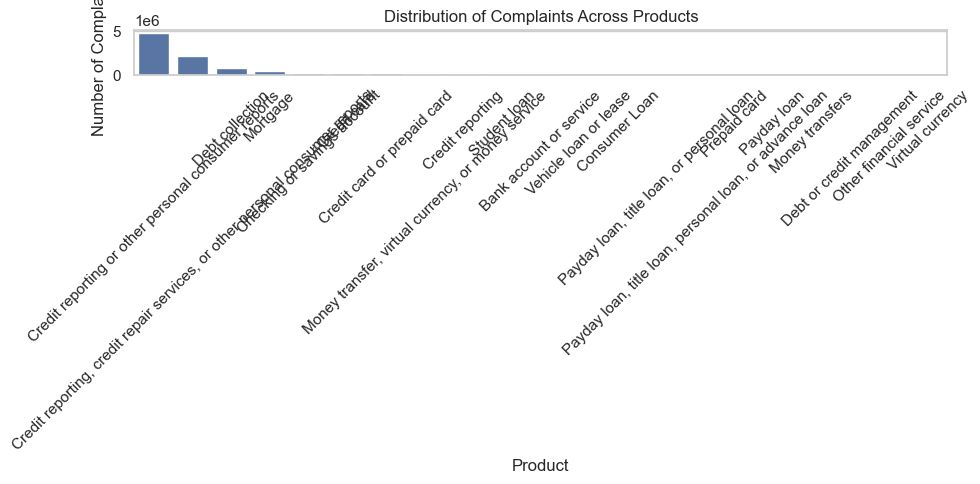

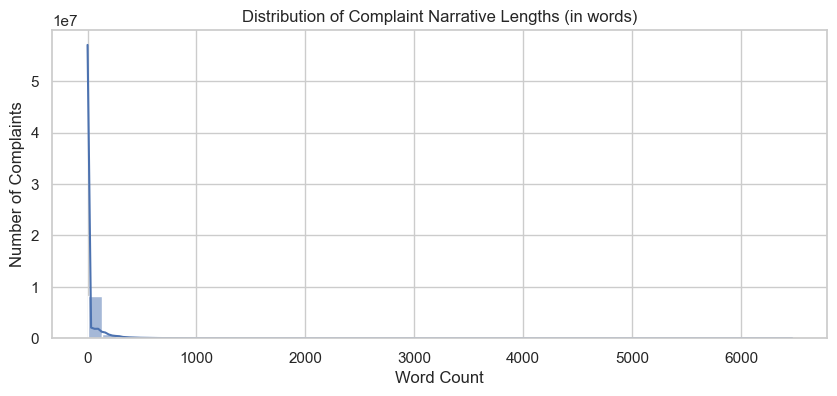


Filtered and cleaned dataset saved. Rows: 177855


In [2]:
# === Setup ===
# Display settings
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

# === Load Data ===
# Load dataset from local path
DATA_PATH = "../data/complaints.csv"
df = pd.read_csv(DATA_PATH)

# Preview
df.head()

# === Initial Exploration ===
# Dataset dimensions
print(f"Total records: {len(df)}")
print(df.info())

# Check missing values
missing_summary = df.isnull().sum()
print("\nMissing Values Summary:\n", missing_summary)

# Complaints with and without narratives
has_narrative = df["Consumer complaint narrative"].notnull().sum()
no_narrative = df["Consumer complaint narrative"].isnull().sum()
print(f"\nComplaints with narrative: {has_narrative}")
print(f"Complaints without narrative: {no_narrative}")

# === Product Distribution ===
# Top-level product distribution
product_counts = df["Product"].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xticks(rotation=45)
plt.title("Distribution of Complaints Across Products")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.show()

# === Narrative Length Analysis ===
# Add word count column
df["narrative_length"] = df["Consumer complaint narrative"].fillna("").apply(lambda x: len(x.split()))

# Histogram of narrative lengths
plt.figure(figsize=(10, 4))
sns.histplot(df["narrative_length"], bins=50, kde=True)
plt.title("Distribution of Complaint Narrative Lengths (in words)")
plt.xlabel("Word Count")
plt.ylabel("Number of Complaints")
plt.show()

# === Filter & Clean ===
# Define product categories of interest
target_products = [
    "Credit card",
    "Personal loan",
    "Buy Now, Pay Later",
    "Savings account",
    "Money transfer, virtual currency, or money service"
]

# Filter to target products with non-empty narratives
filtered_df = df[
    df["Product"].isin(target_products) &
    df["Consumer complaint narrative"].notnull()
].copy()

# Clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)  # Remove special characters
    text = re.sub(r"\b(i am writing to file a complaint.*?)\b", " ", text)  # Remove boilerplate if it appears
    text = re.sub(r"\s+", " ", text)  # Normalize whitespace
    return text.strip()

filtered_df["cleaned_narrative"] = filtered_df["Consumer complaint narrative"].apply(clean_text)

# === Save Results ===
os.makedirs("../data", exist_ok=True)
filtered_df.to_csv("../data/filtered_complaints.csv", index=False)

print(f"\nFiltered and cleaned dataset saved. Rows: {len(filtered_df)}")
